In [160]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import BaggingClassifier

In [161]:
def matrixDisplay(model, iX_test, iy_test) :
    predict = model.predict(iX_test);

    print("Accuracy: ", m.accuracy_score(iy_test, predict))
    print("recall : ", m.recall_score(iy_test, predict))
    print("precision : {} ".format(m.precision_score(iy_test, predict)));
    print("F1 Score : {}".format(m.f1_score(iy_test, predict)))
    print("ROC Score : {}".format(m.roc_auc_score(iy_test,model.predict_proba(iX_test)[:, 1])))

    cm = m.confusion_matrix(iy_test, predict)
    m.ConfusionMatrixDisplay(cm).plot(cmap = 'Reds')


In [162]:
dataset = pd.read_csv('Dataset-Deseased.csv', delimiter= ';')

dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,deceased
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,0
1,1,48,305,257,85,279,331,25400,200,0
2,0,68,310,249,86,277,345,24690,177,0
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,0
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,0
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,0
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,0
4689,1,42,"4,44","35,3",12,27,34,7940,202,0


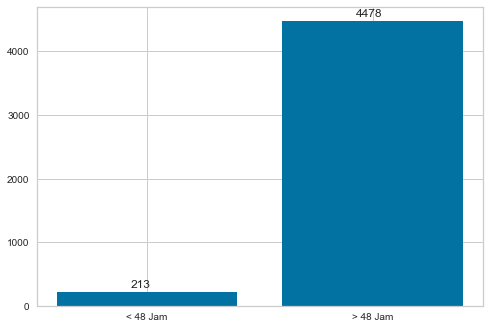

In [163]:
# Kondisi Data

key = ["< 48 Jam", "> 48 Jam"];
value = [dataset[dataset['deceased'] == 1].deceased.count(), dataset[dataset['deceased'] == 0].deceased.count()];

plt.bar(key, value)

for i, v in enumerate(value):
    plt.text(i-.075,
              v+70,
              value[i],
              fontsize=12
             )

In [164]:
# change the ',' into '.' in the float datatype
dataset = dataset.replace(',', '.', regex = True)
dataset.tail()

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,deceased
4686,1,60,3.85,33.7,11.2,29.1,33.2,10200,314,0
4687,1,56,4.53,39.5,13.6,30,34.4,16270,341,0
4688,1,58,6.07,38.7,11.8,19.4,30.5,10670,224,0
4689,1,42,4.44,35.3,12,27,34,7940,202,0
4690,1,49,3.86,34.3,11.7,30.3,34.1,17020,172,0


In [165]:
x = dataset.drop('deceased', axis = 1);
y = dataset.deceased

In [166]:
# imbalance Data Splitting
iX_train, iX_test, iy_train,iy_test = train_test_split(x, y, train_size= .8);

<h3> Random Forest </h3>

In [167]:
from sklearn.ensemble import RandomForestClassifier

rfcModel = RandomForestClassifier(n_estimators = 7, max_depth=7, criterion='entropy', random_state = 42)

rfcModel.fit(iX_train, iy_train);

rfcModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 7,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Accuracy:  0.9510117145899893
recall :  0.18181818181818182
precision : 0.9090909090909091 
F1 Score : 0.30303030303030304
ROC Score : 0.7772418757712876


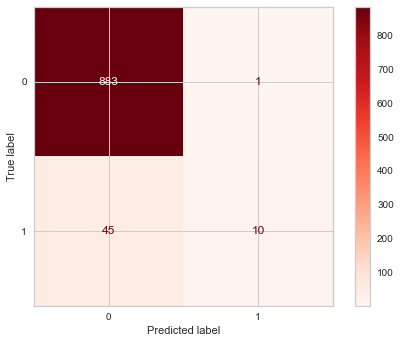

In [168]:
matrixDisplay(rfcModel, iX_test, iy_test)

<h3> Decision Tree </h3>

In [169]:
from sklearn.tree import DecisionTreeClassifier

dtcModel = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state= 42).fit(iX_train,iy_train)

dtcModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Accuracy:  0.9499467518636848
recall :  0.23636363636363636
precision : 0.7222222222222222 
F1 Score : 0.3561643835616438
ROC Score : 0.6473056355409297


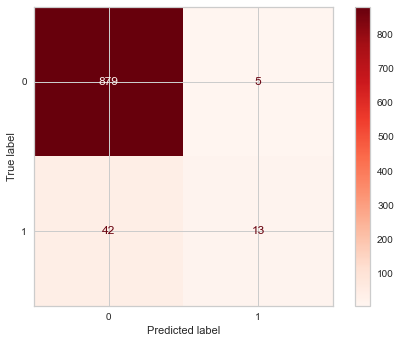

In [170]:
matrixDisplay(dtcModel, iX_test, iy_test)

<h3> Logistic Regression </h3>

In [171]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression(solver='lbfgs', max_iter = 1000, random_state = 42)
logModel.fit(iX_train, iy_train);
logModel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy:  0.9424920127795527
recall :  0.01818181818181818
precision : 1.0 
F1 Score : 0.03571428571428572
ROC Score : 0.6571575483340188


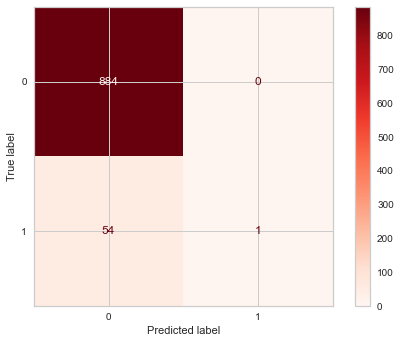

In [172]:
matrixDisplay(logModel, iX_test, iy_test)

<h3>Bagging decision Tree </h3>

In [173]:
baggingDtcModel = BaggingClassifier(base_estimator = dtcModel, n_estimators = 7, random_state =  42).fit(iX_test, iy_test);
baggingDtcModel.get_params();

Accuracy:  0.9659211927582535
recall :  0.43636363636363634
precision : 0.96 
F1 Score : 0.6
ROC Score : 0.9840086384204031


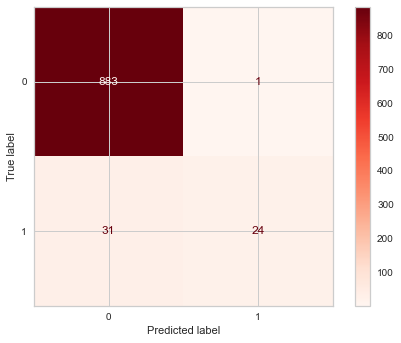

In [174]:
matrixDisplay(baggingDtcModel, iX_test, iy_test)

<h3> Bagging Logistic Regression </h3>

In [175]:
baggingLogModel = BaggingClassifier(base_estimator = logModel, n_estimators = 7, random_state =  42).fit(iX_test, iy_test);
baggingLogModel.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 1000,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': 42,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(max_iter=1000, random_state=42),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 7,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Accuracy:  0.9414270500532481
recall :  0.01818181818181818
precision : 0.5 
F1 Score : 0.03508771929824561
ROC Score : 0.6763266145619087


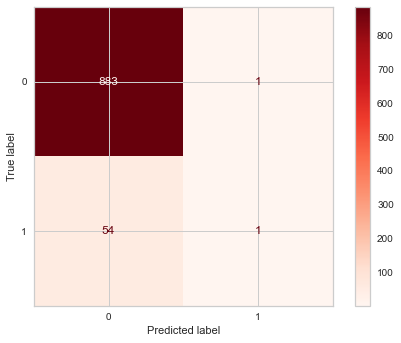

In [176]:
matrixDisplay(baggingLogModel, iX_test, iy_test);

<h3>Balanced Data</h3>

In [177]:
from imblearn.over_sampling import SMOTE

oversamp = SMOTE();
xb, yb = oversamp.fit_resample(x,y);

print("after balanced");

ta = yb[yb == 1].count();
tb = yb[yb == 0].count();

print('Cured Class 1',ta);
print('Cured Class 0',tb);

print('Total rows {}'.format(len(xb)));

after balanced
Cured Class 1 4478
Cured Class 0 4478
Total rows 8956


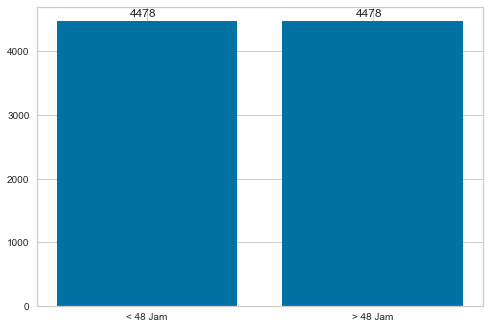

In [178]:
key = ["< 48 Jam", "> 48 Jam"];
value = [yb[yb == 1].count(), yb[yb == 0].count()];

plt.bar(key, value)

for i, v in enumerate(value):
    plt.text(i-.075,
              v+70,
              value[i],
              fontsize=12
             )

In [179]:
bX_train, bX_test, by_train,by_test = train_test_split(xb, yb, train_size= .8);

<h3> Random Forest </h3>

In [180]:
brfcModel = RandomForestClassifier(n_estimators = 7, max_depth=7, criterion='entropy', random_state = 42)

brfcModel.fit(bX_train, by_train);

brfcModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 7,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Accuracy:  0.7600446428571429
recall :  0.7809734513274337
precision : 0.7526652452025586 
F1 Score : 0.7665580890336592
ROC Score : 0.8641348760264689


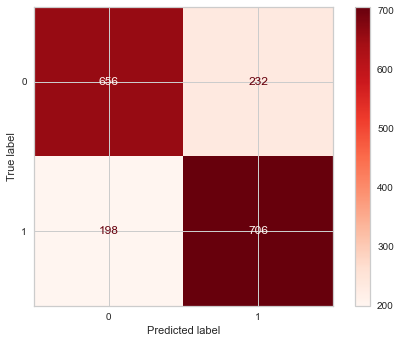

In [181]:
matrixDisplay(brfcModel, bX_test, by_test)

<h3> Decision Tree </h3>

In [182]:
bdtcModel = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state= 42).fit(bX_train,by_train)

bdtcModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Accuracy:  0.7310267857142857
recall :  0.7267699115044248
precision : 0.7365470852017937 
F1 Score : 0.7316258351893096
ROC Score : 0.8203741628796939


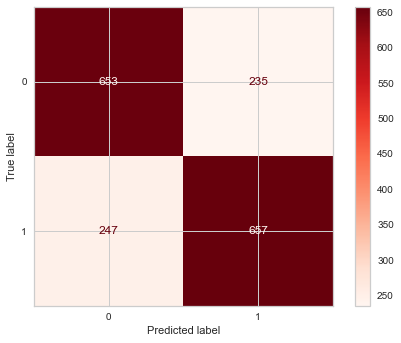

In [183]:
matrixDisplay(bdtcModel, bX_test, by_test)

<h3> Logistic Regression </h3>

In [184]:
from sklearn.linear_model import LogisticRegression

blogModel = LogisticRegression(solver='lbfgs', max_iter = 1000, random_state = 42)
blogModel.fit(bX_train, by_train);
blogModel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy:  0.65625
recall :  0.661504424778761
precision : 0.6585903083700441 
F1 Score : 0.6600441501103753
ROC Score : 0.7176612453161125


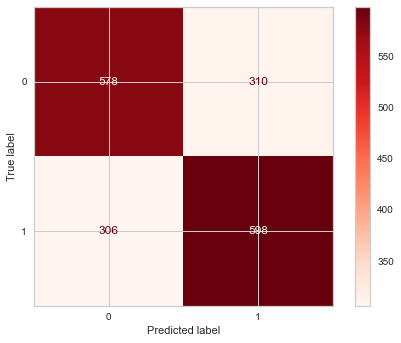

In [185]:
matrixDisplay(blogModel, bX_test, by_test)

<h3>Bagging decision Tree </h3>

In [186]:
bbaggingDtcModel = BaggingClassifier(base_estimator = dtcModel, n_estimators = 7, random_state =  42).fit(bX_test, by_test);
bbaggingDtcModel.get_params();

Accuracy:  0.8431919642857143
recall :  0.8506637168141593
precision : 0.8404371584699454 
F1 Score : 0.845519516217702
ROC Score : 0.9307426203858725


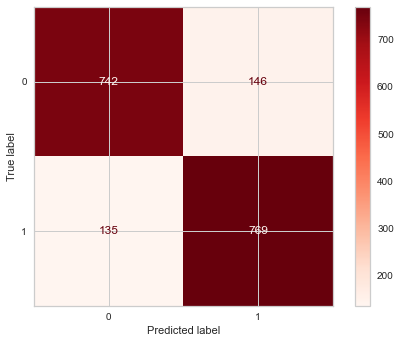

In [187]:
matrixDisplay(bbaggingDtcModel, bX_test, by_test)

<h3> Bagging Logistic Regression </h3>

In [188]:
bbaggingLogModel = BaggingClassifier(base_estimator = logModel, n_estimators = 7, random_state =  42).fit(bX_test, by_test);
bbaggingLogModel.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 1000,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': 42,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(max_iter=1000, random_state=42),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 7,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Accuracy:  0.6545758928571429
recall :  0.6780973451327433
precision : 0.6514346439957492 
F1 Score : 0.6644986449864498
ROC Score : 0.7185930399425975


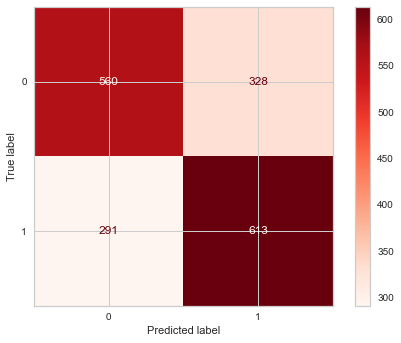

In [189]:
matrixDisplay(bbaggingLogModel, bX_test, by_test);

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

Text(0.5, 1.0, 'Balanced Bagging Logistic Regression')

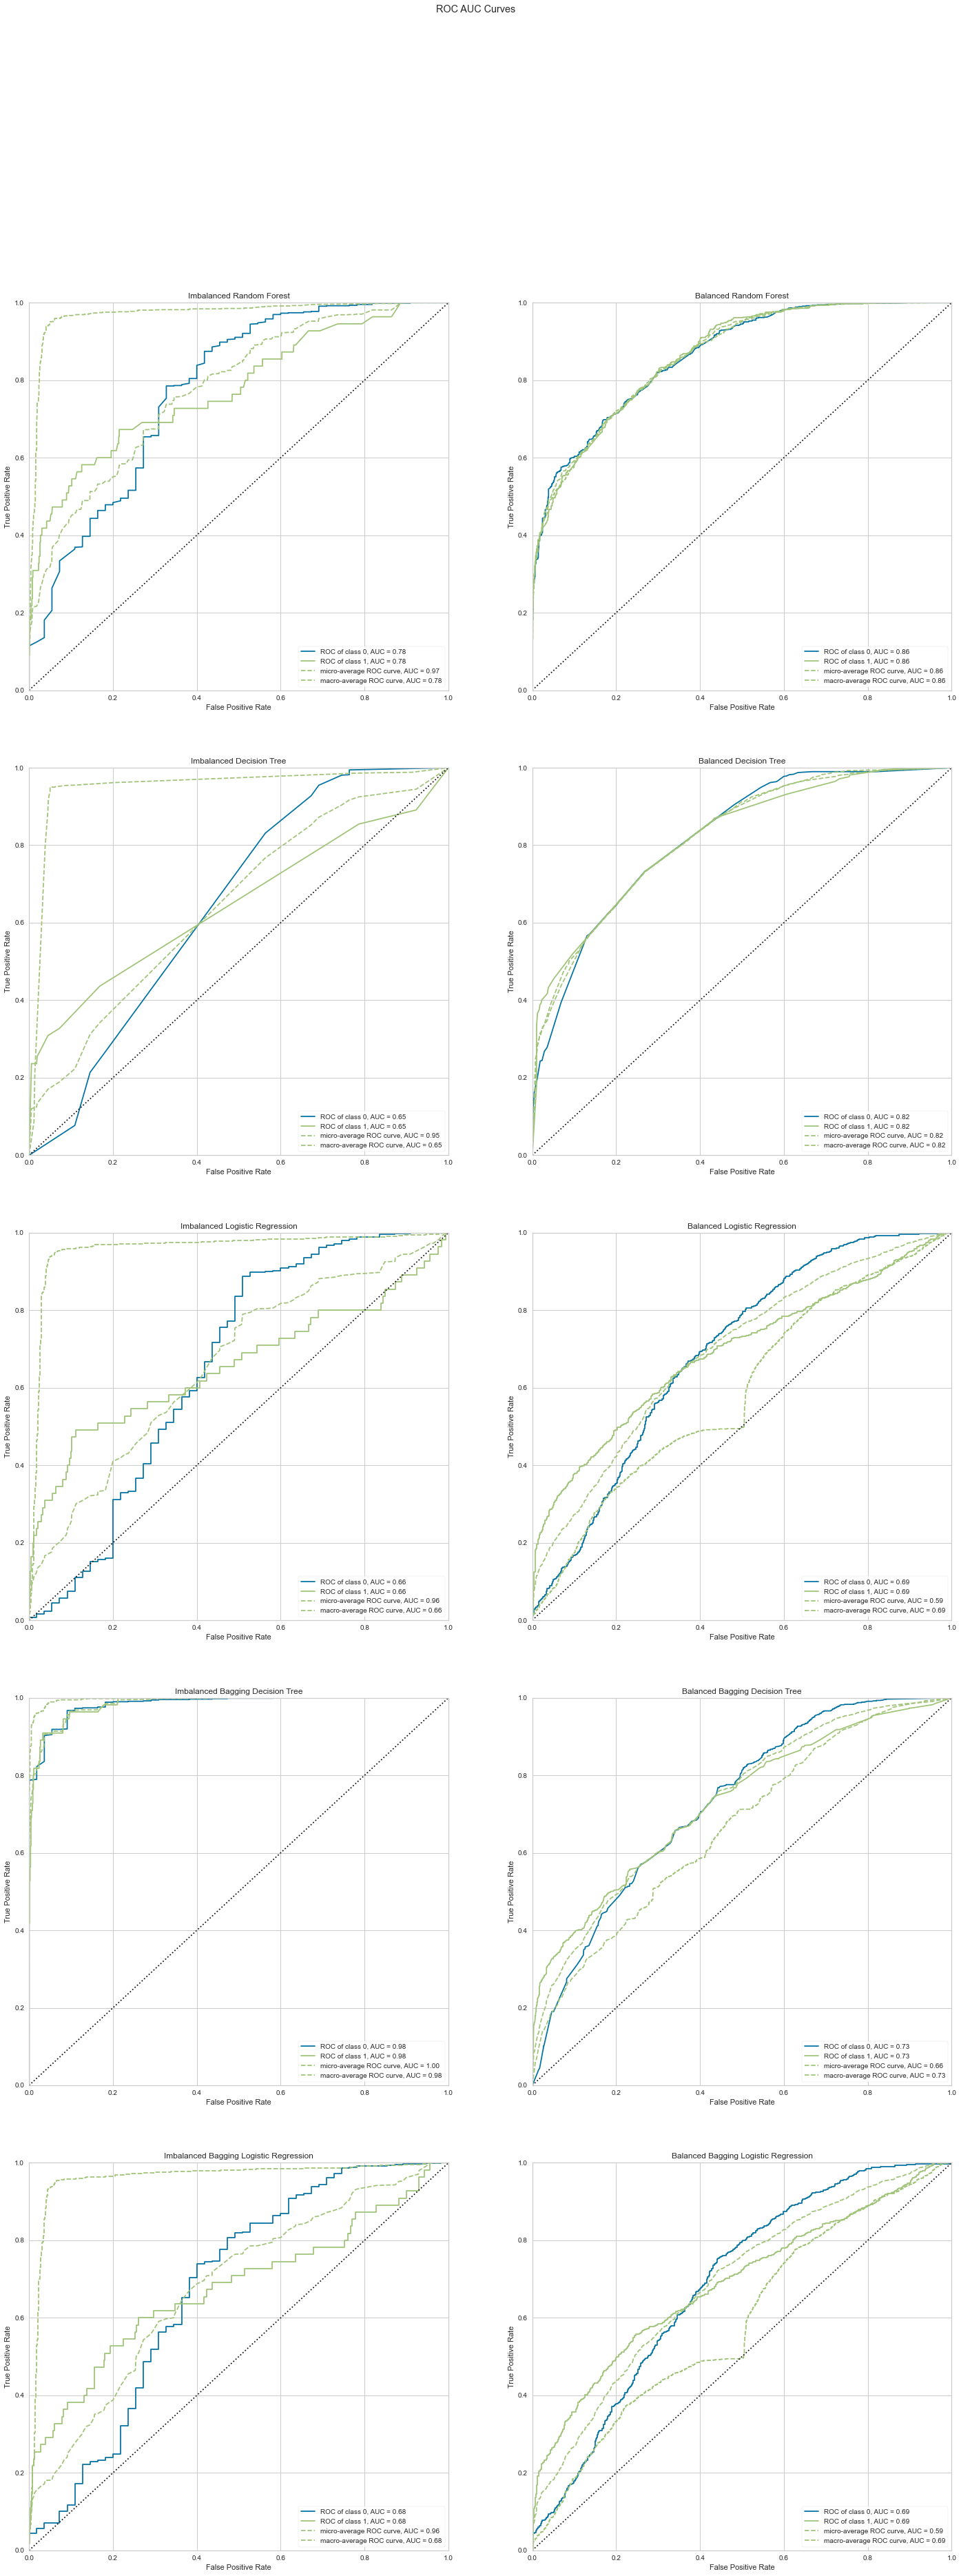

In [190]:
fig, axs = plt.subplots(nrows= 5, ncols= 2, figsize = (12*2, 12*5))
fig.suptitle('ROC AUC Curves')

# -- Imbalance Dataset --
# Random Forest

rfcvisualizer = ROCAUC(rfcModel, ax = axs[0,0])

rfcvisualizer.fit(iX_train, iy_train)
rfcvisualizer.score(iX_test, iy_test)


# Decision Tree
dtcvisualizer = ROCAUC(dtcModel, ax = axs[1,0])

dtcvisualizer.fit(iX_train, iy_train)
dtcvisualizer.score(iX_test, iy_test)

# Logistic Regression
logresvisualizer = ROCAUC(logModel, ax = axs[2,0])

logresvisualizer.fit(iX_train, iy_train)
logresvisualizer.score(iX_test, iy_test)

#Bagging
#  - Bagging Decision Tree
baggingDtcvisualizer = ROCAUC(baggingDtcModel, ax = axs[3,0])

baggingDtcvisualizer.fit(iX_train, iy_train)
baggingDtcvisualizer.score(iX_test, iy_test)

baggingLogvisualizer = ROCAUC(baggingLogModel, ax = axs[4,0])

baggingLogvisualizer.fit(iX_train, iy_train)
baggingLogvisualizer.score(iX_test, iy_test)

# -- Balanced Dataset --
# Random Forest
brfcvisualizer = ROCAUC(brfcModel, ax = axs[0,1])

brfcvisualizer.fit(bX_train, by_train)
brfcvisualizer.score(bX_test, by_test)

# Decision Tree
bdtcvisualizer = ROCAUC(bdtcModel, ax = axs[1,1])

bdtcvisualizer.fit(bX_train, by_train)
bdtcvisualizer.score(bX_test, by_test)

# Logistic Regression
blogresvisualizer = ROCAUC(logModel, ax = axs[2,1])

blogresvisualizer.fit(bX_train, by_train)
blogresvisualizer.score(bX_test, by_test)

#Bagging
#  - Bagging Decision Tree
bbaggingDtcvisualizer = ROCAUC(baggingDtcModel, ax = axs[3,1])

bbaggingDtcvisualizer.fit(bX_train, by_train)
bbaggingDtcvisualizer.score(bX_test, by_test)

bbaggingLogvisualizer = ROCAUC(baggingLogModel, ax = axs[4,1])

bbaggingLogvisualizer.fit(bX_train, by_train)
bbaggingLogvisualizer.score(bX_test, by_test)

rfcvisualizer.finalize();
dtcvisualizer.finalize();
logresvisualizer.finalize();
baggingDtcvisualizer.finalize();
baggingLogvisualizer.finalize();

brfcvisualizer.finalize();
bdtcvisualizer.finalize();
blogresvisualizer.finalize();
bbaggingDtcvisualizer.finalize();
bbaggingLogvisualizer.finalize();

axs[0,0].set_title("Imbalanced Random Forest")
axs[1,0].set_title("Imbalanced Decision Tree")
axs[2,0].set_title("Imbalanced Logistic Regression")
axs[3,0].set_title("Imbalanced Bagging Decision Tree")
axs[4,0].set_title("Imbalanced Bagging Logistic Regression")
axs[0,1].set_title("Balanced Random Forest")
axs[1,1].set_title("Balanced Decision Tree")
axs[2,1].set_title("Balanced Logistic Regression")
axs[3,1].set_title("Balanced Bagging Decision Tree")
axs[4,1].set_title("Balanced Bagging Logistic Regression")

